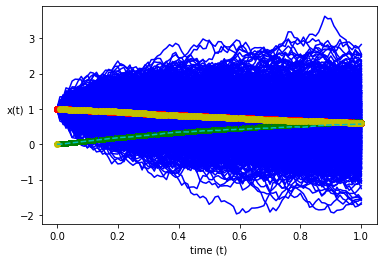

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 1000  # 1000 trajectories=number of simulations

t_0 = 0.0
t_1 = 1.0
N = 100  # Compute 100 grid points
dt = float(t_1 - t_0) / N

x_0 = 1.0
c_lambda = 0.5
q=1.0

def dB(delta_t):
    #Sample a random number at each call
    return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))

ts = np.arange(t_0, t_1 + dt, dt) #computing evenly spaced values
xs = np.zeros(N + 1)
mean=np.zeros(N+1)
mean[0]=1
m=np.zeros(N+1)
calc_mean=np.zeros(N+1) #array for storing the calculated mean from the data produced from 'for loop'
#calc_mean[0]=1
covar=np.zeros(N+1) 
calc_covar=np.zeros(N+1) #array for storing the calculated covariance from the data produced from 'for loop'
x=[[0 for _ in range(N+1)] for _ in range(num_sims)]
xs[0] = x_0
#labels=['x(t)','mean,m(t)','covar,P(t)']

for j in range(num_sims):
    for i in range(1, ts.size):
        t = t_0 + (i - 1) * dt
        x[j][i] = xs[i - 1]
        xs[i] =  x[j][i] - c_lambda* x[j][i] * dt+  dB(dt)
        mean[i]= x_0 * np.exp(-c_lambda*t)
        covar[i]=(1/(2*c_lambda))*(1-np.exp(-2*c_lambda*t))
        #m[i]+=xs[i]    
    plt.plot(ts, xs,color='b',label='x(t)') # plot of x(t)-BLUE
    plt.plot(ts, mean,'o',color='r',label='mean_theor') # plot of mean, m(t)-RED (Theoretical calculation)
    plt.plot(ts, covar,'*',color='g',label='cov_theor') #plot of covariance, P(t)-GREEN (Theoretical Calculation)

#Calculating mean and covariance
sum1=np.zeros(N+1)
for p in range(N+1):
    for q in range(num_sims):
        m[p]+=x[q][p]
    calc_mean[p]=m[p]/num_sims
    for r in range(num_sims):
        sum1[p]+=(x[r][p]-calc_mean[p])**2
    calc_covar[p]=sum1[p]/num_sims
plt.plot(ts, calc_mean,'o',color='y',label='calc_mean') #plot of mean, m(t)-yellow (calculated from the data points)
plt.plot(ts, calc_covar,'--',color='c',label='calc_covar') #plot of covariance, P(t)-cyan ( Calculated from the data points )
        
plt.xlabel("time (t)")
h = plt.ylabel("x(t)")
h.set_rotation(0)

plt.show()
